In [152]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.core import datetools

W:\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  import sys


In [3]:
# Define working dir
os.chdir('W:\crypto_exploration_py')

In [4]:
# Import dataset
prices = pd.read_csv('prices.csv')

In [5]:
# Parse timestamps
prices['datetime'] = pd.to_datetime(prices['datetime'], unit='ms')

In [6]:
# Make em index
prices = prices.set_index('datetime')

___
<font size="5">The Data:</font>

In [7]:
prices.shape

(46112, 69)

In [8]:
# Descriptive statistics summary
prices.describe()

,BTCUSDT,XRPBTC,ETHBTC,EOSBTC,LTCBTC,TRXBTC,XLMBTC,XMRBTC,NEOBTC,XEMBTC,...,GASBTC,MITHBTC,NXSBTC,KNCBTC,CMTBTC,STORJBTC,SALTBTC,SUBBTC,BRDBTC,CVCBTC
count,46112.000000,46112.000000,46112.000000,46112.000000,46112.000000,4.611200e+04,4.611200e+04,46112.000000,46112.000000,4.611200e+04,...,46112.000000,4.611200e+04,46112.000000,4.611200e+04,4.611200e+04,46112.000000,46112.000000,4.611200e+04,4.611200e+04,4.611200e+04
mean,3445.306721,0.000087,0.030924,0.000687,0.009741,7.559368e-06,2.259702e-05,0.012455,0.002030,1.083422e-05,...,0.000552,1.027358e-05,0.000085,3.400001e-05,6.498017e-06,0.000039,0.000060,1.194381e-05,5.434439e-05,1.349904e-05
std,27.206811,0.000001,0.000323,0.000006,0.000115,1.544318e-07,7.489503e-07,0.000143,0.000019,4.888672e-07,...,0.000006,3.730353e-07,0.000005,5.210213e-07,6.898373e-08,0.000002,0.000001,2.803893e-07,6.359627e-07,2.481665e-07
min,3383.870000,0.000085,0.029869,0.000670,0.009475,7.260000e-06,2.136000e-05,0.011993,0.001979,9.980000e-06,...,0.000537,9.570000e-06,0.000074,3.310000e-05,6.360000e-06,0.000037,0.000057,1.142000e-05,5.301000e-05,1.298000e-05
25%,3413.510000,0.000086,0.030798,0.000686,0.009635,7.440000e-06,2.191000e-05,0.012357,0.002018,1.045000e-05,...,0.000549,9.840000e-06,0.000080,3.365000e-05,6.450000e-06,0.000038,0.000059,1.177000e-05,5.396000e-05,1.328000e-05
50%,3458.590000,0.000086,0.031008,0.000689,0.009754,7.550000e-06,2.257000e-05,0.012434,0.002032,1.091000e-05,...,0.000554,1.038000e-05,0.000086,3.391000e-05,6.480000e-06,0.000038,0.000060,1.186000e-05,5.421000e-05,1.363000e-05
75%,3465.020000,0.000087,0.031100,0.000691,0.009841,7.660000e-06,2.333000e-05,0.012514,0.002044,1.124000e-05,...,0.000556,1.053000e-05,0.000089,3.424000e-05,6.520000e-06,0.000040,0.000061,1.208000e-05,5.484000e-05,1.370000e-05
max,3520.030000,0.000089,0.031652,0.000701,0.009961,8.390000e-06,2.381000e-05,0.012851,0.002083,1.168000e-05,...,0.000570,1.124000e-05,0.000092,3.633000e-05,6.730000e-06,0.000071,0.000063,1.283000e-05,5.896000e-05,1.428000e-05


In [9]:
prices.info(max_cols=10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46112 entries, 2019-02-02 11:13:04.696000 to 2019-02-07 19:18:44.019000
Columns: 69 entries, BTCUSDT to CVCBTC
dtypes: float64(69)
memory usage: 24.6 MB


In [10]:
prices.head()

,BTCUSDT,XRPBTC,ETHBTC,EOSBTC,LTCBTC,TRXBTC,XLMBTC,XMRBTC,NEOBTC,XEMBTC,...,GASBTC,MITHBTC,NXSBTC,KNCBTC,CMTBTC,STORJBTC,SALTBTC,SUBBTC,BRDBTC,CVCBTC
datetime,,,,,,,,,,,,,,,,,,,,,
2019-02-02 11:13:04.696,3464.38,0.000089,0.031015,0.000675,0.009581,0.000007,0.000024,0.012493,0.002001,0.000012,...,0.000552,0.000011,0.00009,0.000034,0.000007,0.000038,0.000062,0.000013,0.000055,0.000014
2019-02-02 11:13:14.695,3464.40,0.000089,0.031016,0.000675,0.009582,0.000008,0.000024,0.012493,0.002001,0.000012,...,0.000552,0.000011,0.00009,0.000034,0.000007,0.000038,0.000062,0.000013,0.000055,0.000014
2019-02-02 11:13:24.696,3465.65,0.000089,0.031015,0.000675,0.009583,0.000008,0.000024,0.012493,0.002001,0.000012,...,0.000552,0.000011,0.00009,0.000034,0.000007,0.000038,0.000062,0.000013,0.000055,0.000014
2019-02-02 11:13:34.697,3465.67,0.000089,0.031016,0.000675,0.009581,0.000008,0.000024,0.012493,0.002001,0.000012,...,0.000552,0.000011,0.00009,0.000034,0.000007,0.000038,0.000062,0.000013,0.000055,0.000014
2019-02-02 11:13:44.699,3465.67,0.000089,0.031016,0.000675,0.009581,0.000008,0.000024,0.012499,0.002001,0.000012,...,0.000552,0.000011,0.00009,0.000034,0.000007,0.000038,0.000062,0.000013,0.000055,0.000014




_____________________________________________
<font size="5">Resampling to hourly:</font>

In [179]:
hourly = prices.resample('H')
hourly_ohlc = hourly.ohlc()

In [180]:
hourly_ohlc.head()

BTCUSDT                               XRPBTC            \
                        open     high      low    close      open      high   
datetime                                                                      
2019-02-02 11:00:00  3464.38  3481.14  3464.38  3477.83  0.000089  0.000089   
2019-02-02 12:00:00  3477.45  3477.95  3468.50  3469.33  0.000089  0.000089   
2019-02-02 13:00:00  3468.59  3474.14  3464.22  3465.02  0.000089  0.000089   
2019-02-02 14:00:00  3465.06  3469.12  3457.19  3466.77  0.000089  0.000089   
2019-02-02 15:00:00  3465.21  3467.79  3453.39  3456.81  0.000088  0.000089   

                                           ETHBTC              ...     \
                          low     close      open      high    ...      
datetime                                                       ...      
2019-02-02 11:00:00  0.000089  0.000089  0.031015  0.031130    ...      
2019-02-02 12:00:00  0.000089  0.000089  0.031030  0.031064    ...      
2019-02-02 13:00:00  0.000089  0.000089  0.031049  0.031115    ...      
2019-02-02 14:00:00  0.000088  0.000088  0.031059  0.031109    ...      
2019-02-02 15:00:00  0.000088  0.000089  0.031083  0.031155    ...      

                       SUBBTC              BRDBTC                      \
                          low     close      open      high       low   
datetime                                                                
2019-02-02 11:00:00  0.000013  0.000013  0.000055  0.000055  0.000055   
2019-02-02 12:00:00  0.000013  0.000013  0.000055  0.000055  0.000054   
2019-02-02 13:00:00  0.000013  0.000013  0.000055  0.000055  0.000054   
2019-02-02 14:00:00  0.000013  0.000013  0.000054  0.000054  0.000054   
2019-02-02 15:00:00  0.000012  0.000012  0.000054  0.000054  0.000054   

                                 CVCBTC                                
                        close      open      high       low     close  
datetime                                                               
2019-02-02 11:00:00  0.000055  0.000014  0.000014  0.000014  0.000014  
2019-02-02 12:00:00  0.000055  0.000014  0.000014  0.000014  0.000014  
2019-02-02 13:00:00  0.000054  0.000014  0.000014  0.000014  0.000014  
2019-02-02 14:00:00  0.000054  0.000014  0.000014  0.000014  0.000014  
2019-02-02 15:00:00  0.000054  0.000014  0.000014  0.000014  0.000014  

[5 rows x 276 columns]

___
<font size="4">Open, High, Low and Close of days:</font><br>

In [181]:
daily = prices.resample('D')
daily_ohlc = daily.ohlc()

In [182]:
daily_ohlc.head()

BTCUSDT                               XRPBTC                      \
               open     high      low    close      open      high       low   
datetime                                                                       
2019-02-02  3464.38  3520.03  3447.45  3503.81  0.000089  0.000089  0.000088   
2019-02-03  3504.05  3510.63  3426.34  3458.09  0.000089  0.000089  0.000087   
2019-02-04  3458.11  3483.38  3433.38  3463.30  0.000087  0.000088  0.000086   
2019-02-05  3463.22  3478.95  3448.64  3468.49  0.000086  0.000087  0.000086   
2019-02-06  3468.02  3482.67  3383.87  3405.79  0.000086  0.000086  0.000085   

                        ETHBTC              ...       SUBBTC            \
               close      open      high    ...          low     close   
datetime                                    ...                          
2019-02-02  0.000089  0.031015  0.031588    ...     0.000012  0.000012   
2019-02-03  0.000087  0.031521  0.031652    ...     0.000012  0.000012   
2019-02-04  0.000086  0.031035  0.031363    ...     0.000012  0.000012   
2019-02-05  0.000086  0.031078  0.031150    ...     0.000012  0.000012   
2019-02-06  0.000085  0.030905  0.031006    ...     0.000011  0.000012   

              BRDBTC                                  CVCBTC            \
                open      high       low     close      open      high   
datetime                                                                 
2019-02-02  0.000055  0.000056  0.000054  0.000055  0.000014  0.000014   
2019-02-03  0.000055  0.000059  0.000054  0.000054  0.000014  0.000014   
2019-02-04  0.000054  0.000057  0.000054  0.000055  0.000014  0.000014   
2019-02-05  0.000055  0.000056  0.000053  0.000055  0.000014  0.000014   
2019-02-06  0.000055  0.000055  0.000053  0.000054  0.000013  0.000013   

                                
                 low     close  
datetime                        
2019-02-02  0.000014  0.000014  
2019-02-03  0.000014  0.000014  
2019-02-04  0.000014  0.000014  
2019-02-05  0.000013  0.000013  
2019-02-06  0.000013  0.000013  

[5 rows x 276 columns]

___
<font size="4">Bitcoin gains for the day:</font><br>

In [183]:
# Nice format
round(((daily_ohlc.BTCUSDT.open - daily_ohlc.BTCUSDT.close) / daily_ohlc.BTCUSDT.open * 100) , 1).astype(str) + ' %'

datetime
2019-02-02    -1.1 %
2019-02-03     1.3 %
2019-02-04    -0.2 %
2019-02-05    -0.2 %
2019-02-06     1.8 %
2019-02-07     0.3 %
Freq: D, dtype: object

___
<font size="4">Now the gains of the day for each coins:</font><br>
As log returns

In [184]:
close = daily_ohlc.loc[:, (slice(None), 'close')]
daily_returns = np.log(close.pct_change()+1)

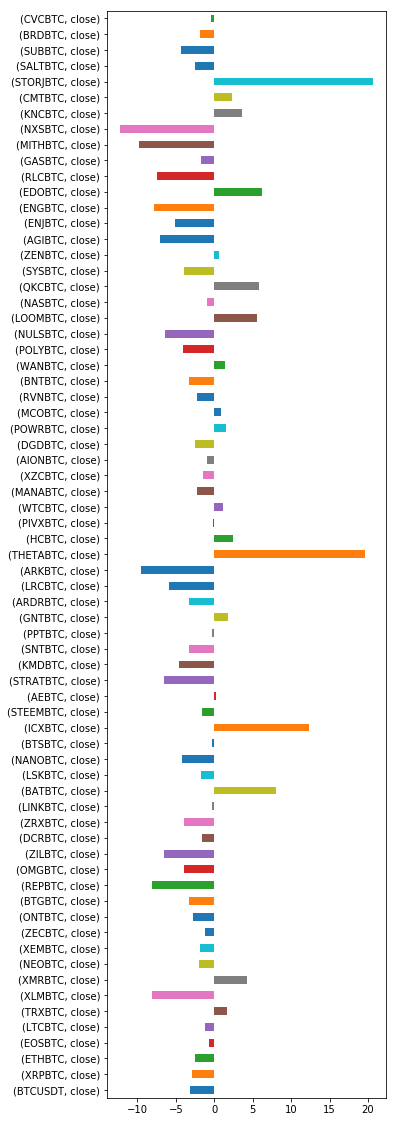

In [185]:
# for the week
(daily_returns*100).sum().plot.barh(figsize=[5, 20])

___
<font size="4">Plot price of some currencies</font><br>

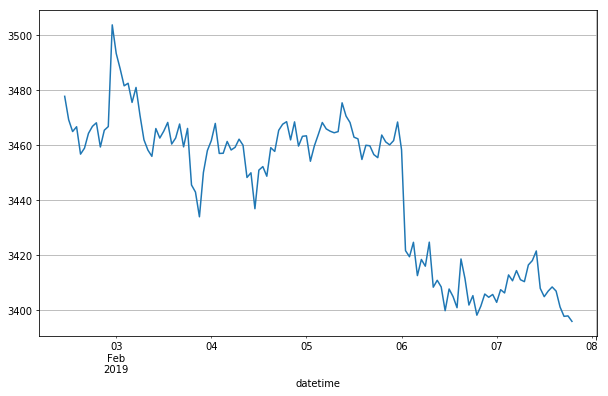

In [186]:
hourly_ohlc['BTCUSDT']['close'].plot(grid=True)
plt.show()

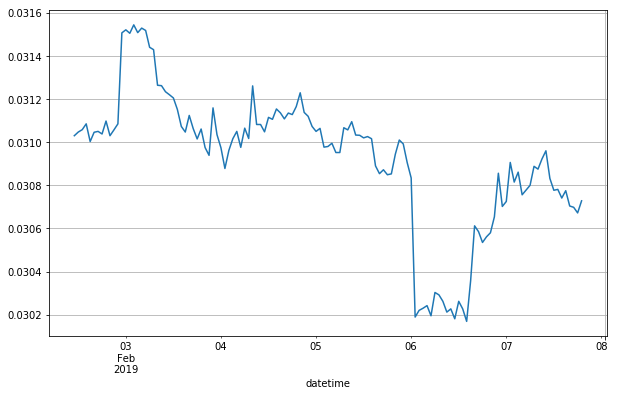

In [187]:
hourly_ohlc['ETHBTC']['close'].plot(grid=True)
plt.show()

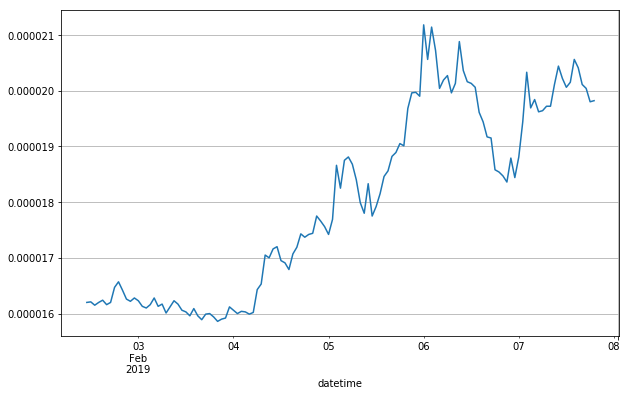

In [188]:
hourly_ohlc['THETABTC']['close'].plot(grid=True)
plt.show()

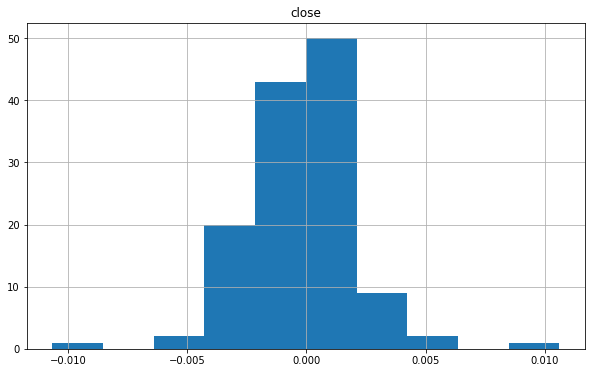

In [189]:
# Distribution of hourly log returns for Bitcoin.
hourly_close = hourly_ohlc.loc[:, (slice(None), 'close')]
hourly_pct_change = np.log(hourly_close.pct_change()+1)

hourly_pct_change['BTCUSDT'].hist()
plt.show()

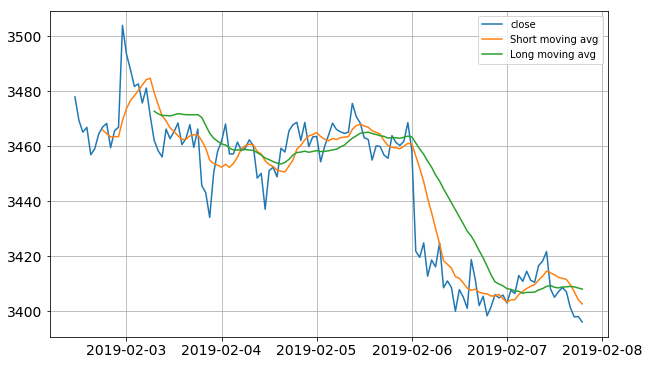

In [190]:
# test1: Matplotlib graph w/o pandas
y1 = hourly_ohlc['BTCUSDT']['close']
y2 = hourly_ohlc['BTCUSDT']['close'].rolling(window=8).mean()
y3 = hourly_ohlc['BTCUSDT']['close'].rolling(window=21).mean()

plt.plot(hourly_ohlc.index.values, y1, y2)
plt.plot(y3)
plt.legend(['close', 'Short moving avg', 'Long moving avg'])
plt.rcParams["figure.figsize"] = (10,6)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

In [191]:
# test2: Matplotlib graph from pandas df
x = pd.DataFrame(hourly_ohlc['BTCUSDT']['close'].copy())
x['short_moving_average'] = hourly_ohlc['BTCUSDT']['close'].rolling(window=8).mean()
x['long_moving_average'] = hourly_ohlc['BTCUSDT']['close'].rolling(window=21).mean()

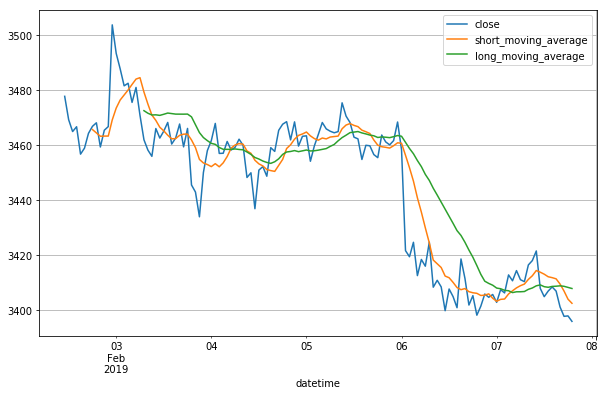

In [192]:
x.plot(grid=True)

___
<font size="4">Volatility calculation</font><br>
As a measurement of the change in variance in the returns over a specific period of time

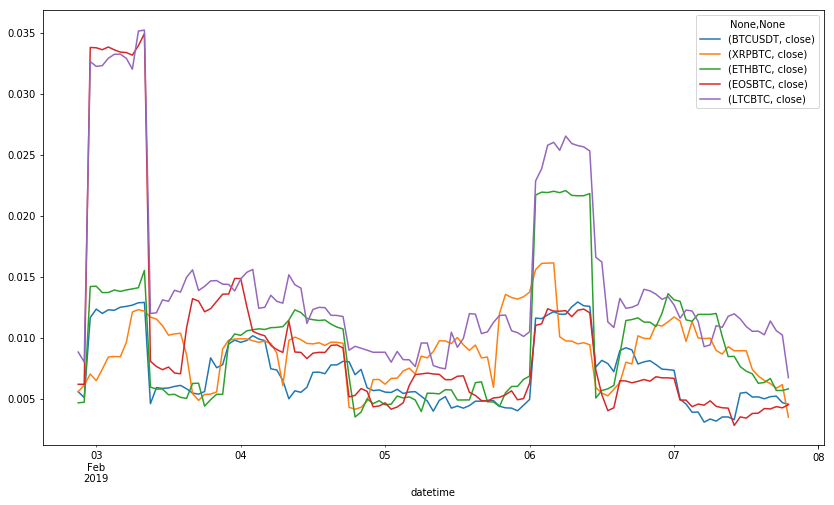

In [193]:
# Use 5 coins
sample = hourly_pct_change.iloc[:, 0:5]

# Define the minumum of periods to consider 
min_periods = 10

# Calculate the volatility
vol = sample.rolling(min_periods).std() * np.sqrt(min_periods) 

vol.plot(figsize=(14, 8))
plt.show()

___
<font size="4">Ordinary Least-Squares Regression (OLS)</font><br>

In [202]:
# Calculate the returns 
all_returns = np.log(hourly_close / hourly_close.shift(1))

# Isolate the Bitcoin and Ethereum returns 
btc_returns = all_returns['BTCUSDT']
eth_returns = all_returns['ETHBTC']

# Build a new df with the Bitcoin and Ethereum returns
return_data = pd.concat([btc_returns, eth_returns], axis=1)[1:]
return_data.columns = ['BTCUSDT', 'ETHBTC']

# Add a constant 
X = sm.add_constant(return_data['BTCUSDT'])

# Construct the model
model = sm.OLS(return_data['ETHBTC'],X).fit()

# Print the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ETHBTC   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     40.82
Date:                Wed, 13 Feb 2019   Prob (F-statistic):           2.95e-09
Time:                        08:22:42   Log-Likelihood:                 569.67
No. Observations:                 128   AIC:                            -1135.
Df Residuals:                     126   BIC:                            -1130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.354e-05      0.000      0.212      0.832      -0.000       0.001
BTCUSDT        0.6987      0.109      6.389      0.000       0.482       0.915
==============================================================================
Omnibus:                       22.426   Durbin-Watson:                   2.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.979
Skew:                          -0.309   Prob(JB):                     4.83e-25
Kurtosis:                       7.540   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

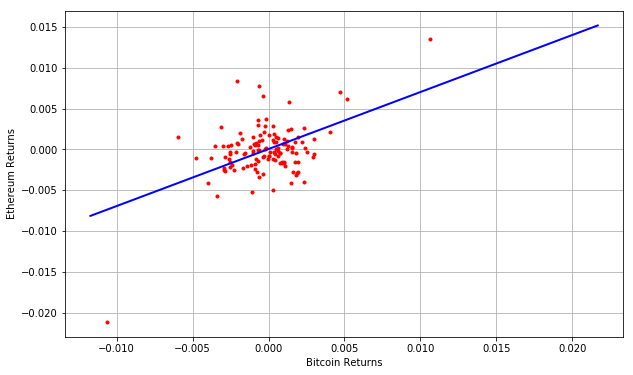

In [203]:
# Plot returns of BTCUSDT and ETHBTC
plt.plot(return_data['BTCUSDT'], return_data['ETHBTC'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Bitcoin Returns')
plt.ylabel('Ethereum Returns')

# Show the plot
plt.show()

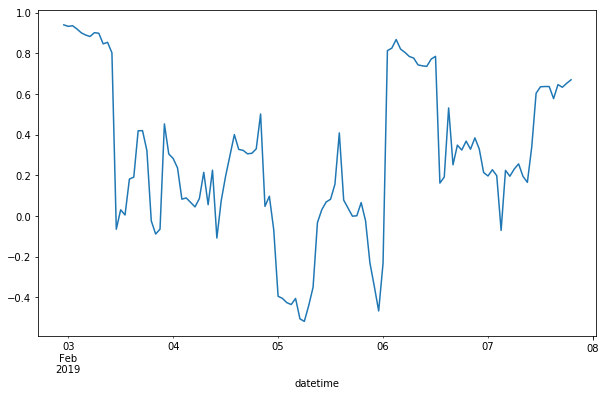

In [206]:
# Plot the rolling correlation of returns
return_data['ETHBTC'].rolling(window=12).corr(return_data['BTCUSDT']).plot()
plt.show()